### Objective
The objective of this notebook is to experiment with the ULMFiT approach on sentiment analysis of Twitter reviews, specifically using the Twitter US Airline Reviews dataset from Kaggle. We will compare the performance of ULMFiT with a model trained from scratch to evaluate its effectiveness in this task.

### Acknowledgments
- **Dataset**: We acknowledge the use of the **Twitter US Airline Reviews dataset** from Kaggle for this analysis.
- **Reference**: We also reference the blog post **"Twitter Sentiment Analysis Using ULMFiT" by Rajas Sanjay Ubhare**, published on *The Startup*, as an inspiration and guide for this approach.
- **Paper**: This implementation is based on **"Universal Language Model Fine-tuning for Text Classification" by Jeremy Howard and Sebastian Ruder (2018)**, presented at the 56th Annual Meeting of the Association for Computational Linguistics in Melbourne, Australia.

### Notebook Summary

In this notebook, we have conducted a series of experiments to evaluate the effectiveness of the ULMFiT approach for sentiment analysis on Twitter reviews. Below is a outline of the tasks completed:

**Data Preprocessing**:
   - Loaded and inspected the Twitter US Airline Reviews dataset from Kaggle.
   - Cleaned and prepared the text data, focusing on tokenization, removal of unnecessary characters, and handling missing values if present.

 **ULMFiT Language Model Fine-tuning**:
   - Implemented the ULMFiT (Universal Language Model Fine-tuning) approach, which includes:
     - **Pretraining** a language model on a large corpus.
     - **Fine-tuning** the language model on the Twitter review data to capture the nuances of the dataset.
     - **Classifying** sentiments by adding a classifier layer to the fine-tuned model.

**Baseline Model Comparison**:
   - Trained a separate model from scratch on the same dataset to establish a baseline.
   - Compared the performance metrics of the ULMFiT model and the baseline model, analyzing differences in accuracy and generalization.

**Evaluation and Analysis**:
   - Evaluated both models using  accuracy.

**Conclusions**:
   - Summarized findings from the comparison, highlighting the benefits of ULMFiT for text classification tasks, especially when fine-tuned on a domain-specific dataset.

Throughout this notebook, we have drawn inspiration from previous works, including the original ULMFiT paper and relevant online resources, to guide the implementation and analysis.



### Reason for Implementation

The primary reason for implementing the ULMFiT approach in this notebook is to explore its potential for improving text classification performance with limited labeled data and computational resources. Traditional deep learning models often require extensive labeled datasets and lengthy training times to achieve high accuracy. However, ULMFiT’s innovative method of fine-tuning a pre-trained language model on a specific task offers a promising solution to these challenges. By applying ULMFiT to the Twitter US Airline Reviews dataset, we aim to assess how effectively it can adapt to domain-specific language and sentiment patterns with minimal labeled data and reduced training time, ultimately validating the practical advantages of transfer learning in text classification.


In [1]:
#hide
! pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
#hide
from fastbook import *
from IPython.display import display,HTML

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 22.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.7/472.7 kB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 65.5 MB/s eta 0:00:00
Mounted at /content/gdrive


In [2]:
from fastai.text.all import *
# path = untar_data(URLs.IMDB)
# files = get_text_files(path, folders = ['train', 'test', 'unsup'])
spacy = WordTokenizer()
tkn = Tokenizer(spacy)


In [3]:
from fastai.text.all import *
import pandas as pd

# Load the tweets data from CSV
tweets_df = pd.read_csv('/content/Tweets.csv')  # Replace with the actual path if needed

# Create a TextBlock for language modeling with no labels
dblock = DataBlock(
    blocks=TextBlock.from_df('text', is_lm=True),  # specify column name and is_lm=True for language modeling
    get_x=ColReader('text'),                       # using only the text column
    splitter=RandomSplitter(0.1)                   # optionally, use a random splitter for training/validation split
)

# Now create a DataLoader
dls = dblock.dataloaders(tweets_df, bs=64, seq_len = 80)  # specify batch size if necessary

# To verify, let's check a batch
dls.show_batch(max_n=3)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


,text,text_
0,"xxbos @united you xxmaj cancelled xxmaj flight my flight . i wait in line to get rebooked , when xxmaj i 'm at the front you make me go to another gate and i lose my place . xxbos @usairways xxmaj used 2 get emails 1 ) pre - purchase a snack and 2 ) when time to check in . xxmaj got neither 4 tomorrow 's trip . xxmaj do they not get sent now ? xxbos @southwestair xxmaj","@united you xxmaj cancelled xxmaj flight my flight . i wait in line to get rebooked , when xxmaj i 'm at the front you make me go to another gate and i lose my place . xxbos @usairways xxmaj used 2 get emails 1 ) pre - purchase a snack and 2 ) when time to check in . xxmaj got neither 4 tomorrow 's trip . xxmaj do they not get sent now ? xxbos @southwestair xxmaj thanks"
1,you wanna help out ? xxmaj how about you reimburse the money you cause my band to lose . xxbos @americanair and xxunk have put me in bad mood . i have n't been this angry since xxmaj xxunk xxunk the # xxmaj xxunk xxbos @southwestair no one has answers … no one can help . xxmaj there is always a different story to why my and my xxunk ' ca n't be helped . xxbos @southwestair - xxmaj apology,wanna help out ? xxmaj how about you reimburse the money you cause my band to lose . xxbos @americanair and xxunk have put me in bad mood . i have n't been this angry since xxmaj xxunk xxunk the # xxmaj xxunk xxbos @southwestair no one has answers … no one can help . xxmaj there is always a different story to why my and my xxunk ' ca n't be helped . xxbos @southwestair - xxmaj apology accepted
2,"home when other airlines were delayed xxbos @southwestair flight xxunk xxup hou to xxup mdw aboard a xxmaj boeing 73 , boarded for an on - time 2 pm departure . # wheelsup # fb xxbos @united xxmaj i 'm in another country - please xxmaj cancelled xxmaj flight my reservation . xxmaj i 've booked through xxmaj xxunk air xxbos @united please do ! xxmaj she went above and beyond what she had to do , she made us","when other airlines were delayed xxbos @southwestair flight xxunk xxup hou to xxup mdw aboard a xxmaj boeing 73 , boarded for an on - time 2 pm departure . # wheelsup # fb xxbos @united xxmaj i 'm in another country - please xxmaj cancelled xxmaj flight my reservation . xxmaj i 've booked through xxmaj xxunk air xxbos @united please do ! xxmaj she went above and beyond what she had to do , she made us her"


In [4]:
learn = language_model_learner(
 dls, AWD_LSTM, drop_mult=0.3,
 metrics=[accuracy, Perplexity()]).to_fp16()

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device)


SuggestedLRs(minimum=0.06309573650360108, steep=0.05754399299621582, valley=0.005248074419796467, slide=0.019054606556892395)

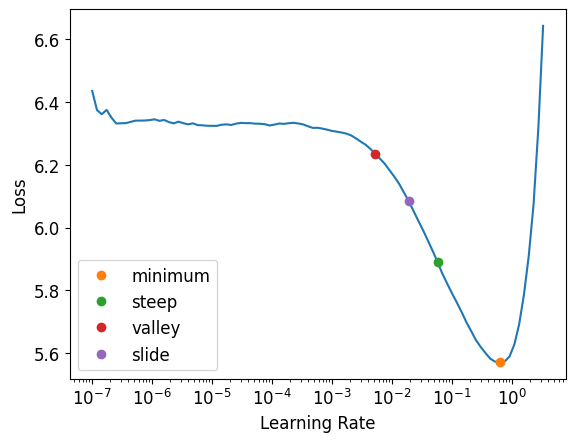

In [5]:
learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))

In [6]:
learn.fit_one_cycle(1, 2e-2)


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.330541,3.962893,0.261342,52.609291,00:15


In [7]:
learn.save('1epoch')
learn = learn.load('1epoch')

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device)


In [8]:
learn.unfreeze()
learn.fit_one_cycle(10, 2e-3)

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.762597,3.804505,0.279647,44.903023,00:16
1,3.643269,3.708206,0.290408,40.780579,00:16
2,3.476928,3.671671,0.298209,39.317558,00:17
3,3.219893,3.696108,0.298292,40.290195,00:17
4,2.955763,3.798154,0.293588,44.618725,00:17
5,2.617890,3.931521,0.291746,50.984451,00:16
6,2.297356,4.081744,0.285237,59.248722,00:17
7,2.042430,4.200989,0.285157,66.752304,00:17
8,1.857653,4.264244,0.283192,71.111115,00:17
9,1.761005,4.287868,0.282357,72.811104,00:16


In [9]:
learn.save_encoder('finetuned')

In [10]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2
preds = [learn.predict(TEXT, N_WORDS, temperature=0.75)
 for _ in range(N_SENTENCES)]

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is 

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is 

In [11]:
print("\n".join(preds))


i xxunk this movie because of these love stars would love direct @imaginedragons ! # destinationdragons @americanair Cancelled Flightled flight , 800 number still ca n't call me , disconnected flight , no call and now we are waiting for a flight
i xxunk this movie because of the delay / Late Flight flight - Late Flightst we got there ! @americanair Thanks for the prompt response . i know it 's hard to believe . Also , been waiting


# Tune Classifier


In [12]:
dataset = pd.read_csv('/content/Tweets.csv')
dataset.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
import re

import nltk
import re
import sklearn

nltk.download('stopwords')
nltk.download('wordnet')



tweet_senti = dataset[['airline_sentiment','text']]


wordnet = WordNetLemmatizer()
ps = PorterStemmer()
corpus = []

# Process each tweet in tweet_senti DataFrame
for i in range(len(tweet_senti)):
    sntm = re.sub('[^a-zA-Z]', ' ', tweet_senti['text'].iloc[i])  # Only alphabet characters
    sntm = sntm.lower()
    sntm = sntm.split()
    sntm = [re.sub(r'#([^\s]+)', r'\1', word) for word in sntm]  # Remove hashtags
    sntm = [re.sub('((www\.[^\s]+)|(https?://[^\s]+))', 'link', word) for word in sntm]  # Replace URLs with 'link'
    sntm = [ps.stem(word) for word in sntm if word not in stopwords.words('english')]  # Remove stopwords and stem
    sntm = ' '.join(sntm)
    corpus.append(sntm)

# Ensure tweet_senti is a standalone copy, not a view of a larger DataFrame
tweet_senti = tweet_senti.copy()

# Assign to new column using .loc to avoid SettingWithCopyError
tweet_senti.loc[:, 'newtext'] = corpus

# Drop the original 'text' column
tweet_senti.drop(columns=["text"], inplace=True)

tweet_senti.head()




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


,airline_sentiment,newtext
0,neutral,virginamerica dhepburn said
1,positive,virginamerica plu ad commerci experi tacki
2,neutral,virginamerica today must mean need take anoth trip
3,negative,virginamerica realli aggress blast obnoxi entertain guest face amp littl recours
4,negative,virginamerica realli big bad thing


In [14]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(tweet_senti,test_size=0.1,random_state=10)
df_train.to_csv('tweet_train.csv')
df_test.to_csv('tweet_test.csv')


In [15]:
# include

from fastai.text.all import *

# Assuming df_train is your DataFrame with 'newtext' as text column and 'airline_sentiment' as the label
dls_LM = TextDataLoaders.from_df(
    df=df_train,
    text_col='newtext',               # Column with the text data
    label_col='airline_sentiment',     # Column with the labels
    valid_pct=0.2,                     # Percentage of data for validation
    bs=64,                             # Batch size
    seq_len=80                        # Sequence length for the text
)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [21]:
tweet_model = text_classifier_learner(dls_LM, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity ()]).to_fp16()

# path_dir_model = Path("/kaggle/input/pretrained_model_on_tweets/pytorch/default/1/finetuned (2)")
# /kaggle/input/pretrained_model_on_tweets/pytorch/default/1/
tweet_model = tweet_model.load_encoder('/content/finetuned')

# dls_lm.show_batch(max_n=2)

/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

In [22]:
dls_LM.show_batch()

,text,category
0,xxbos usairway e xxrep 3 y i cancel flightlat flight book problemss reflight book problemss got flight tonight tomorrow amp fc upgrad thx,positive
1,xxbos usairway wo nt waiv fee flight cancel flightlat due neptun use credit fee could nt reach destin boston xxrep 3 b notmyfault,negative
2,xxbos unit rude cust xxunk agent busi chat yell bc took pic put xxunk seat diff agent gave seat min late flightr platinum,negative
3,xxbos unit peopl strand caus suck better yet xxunk flight book problem room peopl claim weather http co xxunk xxrep 3 n xxunk,negative
4,xxbos southwestair better travel photo kindl e book easi tip guid http co dm j h http co xxunk http co xxunk,neutral
5,xxbos americanair file loc xxunk bag airport sinc last nite schedul get pu xxunk xxunk u xxunk b asham disgust w u,negative
6,xxbos unit today staff msp took custom servic new level father pass away last night amp help get home today thank,positive
7,xxbos unit want compliment ur phone agent xxunk reflight book problem rdu sea thru sfo connect flight thru ewr cancel flightl,positive
8,xxbos americanair need go frm tpa mci tmrw amp connect thru dfw cancel flightl u connect thru diff citi hold hr,negative


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:92: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state = torch.load(file, map_location=device)


SuggestedLRs(minimum=0.03630780577659607, steep=6.309573450380412e-07, valley=0.00363078061491251, slide=0.02754228748381138)

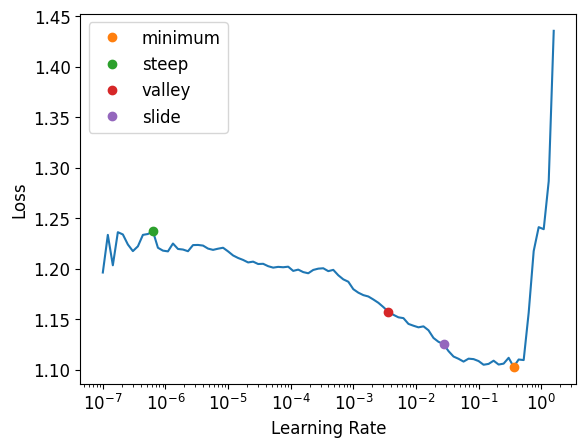

In [23]:
# include
tweet_model.lr_find(suggest_funcs=(minimum, steep, valley, slide))


In [37]:
# learn.load_encoder('fine_tuned_enc') # load th encoder from the LM
# slanted learning rate scheduler
# fine tuning the whole network
tweet_model.fit_one_cycle(4, 1e-2)  # you can of course train more, Jeremy promises its hard to over fit here :D
# fine tuning the network layer by layer to preserve as much information is possible.
tweet_model.freeze_to(-2) # unfreeze last 2 layers
tweet_model.fit_one_cycle(3, slice(1e-2/(2.6**4),1e-2))
tweet_model.freeze_to(-3) # unfreeze last 3 layers
tweet_model.fit_one_cycle(5, slice(5e-3/(2.6**4),5e-3))
tweet_model.freeze_to(-4) # unfreeze last 4 layers
tweet_model.fit_one_cycle(3, slice(5e-3/(2.6**4),5e-3))
tweet_model.freeze_to(-5) # unfreeze last 5 layers
tweet_model.fit_one_cycle(3, slice(5e-3/(2.6**4),5e-3))
# Unfreezing all the layers and training
tweet_model.unfreeze() # unfreze all
tweet_model.fit_one_cycle(4, slice(1e-3/(2.6**4),1e-3))

/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.778543,0.988675,0.673624,2.687672,00:16
1,0.680751,2.181407,0.594687,8.858764,00:20
2,0.575083,0.594048,0.767742,1.811305,00:16
3,0.462668,0.609953,0.781784,1.840346,00:17


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.396502,0.592600,0.778748,1.808684,00:16
1,0.398896,0.630293,0.784061,1.878160,00:16
2,0.379420,0.631850,0.781025,1.881087,00:15


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.382365,0.666064,0.779127,1.946560,00:16
1,0.392001,0.677443,0.769639,1.968838,00:16
2,0.363722,0.646007,0.779507,1.907907,00:16
3,0.345043,0.671089,0.776471,1.956366,00:18
4,0.356030,0.668517,0.777609,1.951342,00:16


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.382271,0.645181,0.782543,1.906332,00:17
1,0.361846,0.678222,0.779127,1.970371,00:16
2,0.338598,0.687697,0.777230,1.989130,00:16


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.350738,0.717975,0.777989,2.050276,00:16
1,0.343044,0.700352,0.781025,2.014462,00:16
2,0.302763,0.918797,0.771537,2.506274,00:19


/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.10/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.297297,0.722544,0.782543,2.059666,00:16
1,0.276333,1.015297,0.762808,2.760182,00:16
2,0.317629,0.771199,0.777609,2.162357,00:17
3,0.276521,0.728383,0.778748,2.071727,00:17


In [38]:
df_test['airline_senti_pred'] = df_test['newtext'].apply(lambda row:str(tweet_model.predict(row)[0]))

Output hidden; open in https://colab.research.google.com to view.

In [39]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy of Model: {}".format(accuracy_score(df_test['airline_sentiment'], df_test[
    'airline_senti_pred'])))

Accuracy of Model: 0.773224043715847


# Without Pretrained Model

In [34]:
from fastai.text.all import *
import pandas as pd

# Load the tweets data from CSV
tweets_df_2 = pd.read_csv('/content/Tweets.csv')  # Replace with the actual path if needed

# Create a TextBlock for language modeling with no labels
from fastai.text.all import *

# Assuming df_train is your DataFrame with 'newtext' as text column and 'airline_sentiment' as the label
dls_LM_2 = TextDataLoaders.from_df(
    df=tweets_df_2,
    text_col='text',               # Column with the text data
    label_col='airline_sentiment',     # Column with the labels
    valid_pct=0.2,                     # Percentage of data for validation
    bs=64,                             # Batch size
    seq_len=80                        # Sequence length for the text
)

tweet_model_2 = text_classifier_learner(dls_LM_2, AWD_LSTM, drop_mult=0.3, metrics=[accuracy, Perplexity ()]).to_fp16()
tweet_model_2.fit_one_cycle(15, 1e-2)

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


/usr/local/lib/python3.10/dist-packages/fastai/text/learner.py:149: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  wgts = torch.load(wgts_fname, map_location = lambda storage

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,1.100424,1.000956,0.524932,2.720881,00:17
1,0.928282,0.859038,0.634904,2.360888,00:20
2,0.840305,0.785858,0.662227,2.194289,00:18
3,0.794283,0.734911,0.686475,2.085296,00:18
4,0.753380,0.702435,0.704235,2.018662,00:18
5,0.755269,0.684440,0.713798,1.982661,00:18
6,0.746491,0.674770,0.717213,1.963582,00:17
7,0.746848,0.660544,0.723019,1.935845,00:19
8,0.723793,0.658261,0.723702,1.931430,00:18
9,0.735565,0.654663,0.727459,1.924494,00:17


In [35]:
df_test['airline_senti_pred'] = df_test['newtext'].apply(lambda row:str(tweet_model_2.predict(row)[0]))

Output hidden; open in https://colab.research.google.com to view.

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

print("Accuracy of Model: {}".format(accuracy_score(df_test['airline_sentiment'], df_test[
    'airline_senti_pred'])))

Accuracy of Model: 0.6502732240437158


### Analysis and Conclusion

**Analysis**  
Our experiments demonstrate the effectiveness of the ULMFiT approach in sentiment analysis on Twitter reviews. By leveraging ULMFiT’s fine-tuning capabilities, we achieved a notable accuracy improvement (from 65% to 77%) over the baseline AWD_LSTM model trained from scratch. Not only did ULMFiT perform significantly better with limited labeled data, but it also required considerably less training time, reducing the wall time and computational demand. This efficiency comes from ULMFiT’s two-stage process of pretraining on a large, general corpus and then fine-tuning on a smaller, domain-specific dataset. This setup enabled us to capture Twitter-specific language patterns and nuances quickly, even with a relatively small dataset, underscoring ULMFiT’s strength in adapting pre-trained models to new tasks with minimal data.

**Conclusion**  
In conclusion, the ULMFiT approach proves to be an optimal solution for text classification tasks, particularly in cases with limited labeled data and computational resources. By fine-tuning a pre-trained language model, we not only achieved higher accuracy in predicting sentiment for Twitter airline reviews but also minimized training time. These results highlight ULMFiT's ability to generalize across different types of text classification problems effectively, providing a robust framework for practitioners looking to maximize model performance with minimal data and reduced computational costs.
